# Salary Predcition Machine Learning Project


Description :A machine learning project that predicts salary  based on factors 
job_title,job_type,experience_level,location,salary_currency,salary
.It uses algorithms to identify patterns and provide personalized prediction of Salary.
Regression Problem

In [174]:
# Machine Learning Life Cycle Steaps :
# Problem Definition
# Data Collection
# Data Cleaning
# Exploratory Data Analysis (EDA)
# Feature Engineering and Selection
# Data Preprocessing
# Data Spliting
# Model Selection
# Model Training
# Model Evaluation and Tuning
# Model Deployment
# Model Monitoring and Maintenance

Steap-1 : Problem Statement / Defination

In [175]:
# Salary variable is the contnious nature variable.so it comes in the Regression problem 
#of ML Learning i.e superviesd Learning 
#to predicit result based of Salary factor input by user. 

Steap-2 : Data Collecting 

In [176]:
import pandas as pd 
import numpy as np 

In [177]:
df=pd.read_csv("dataset.csv")
df

,id,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000
...,...,...,...,...,...,...,...
1166,2243,ML Ops,Full Time,Senior,Toronto,USD,228000
1167,2249,ML Ops,Full Time,Senior,Boston,USD,115000
1168,2250,ML Ops,Full Time,Senior,Delhi,USD,76000
1169,2255,ML Ops,Full Time,Senior,San Francisco,USD,68000


Steap-3 : Data Cleaning 

In [178]:
df.isnull().sum()

id                  0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [179]:
df.duplicated().sum()

0

In [180]:
df.isna().sum()

id                  0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

Steap - 4 : Exploratory Data Analysis (EDA)


In [181]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [183]:
df.describe()

,id,salary
count,1171.000000,1171.000000
mean,931.620837,64836.037575
std,647.445266,32551.767046
min,0.000000,30000.000000
25%,364.500000,45000.000000
50%,815.000000,63000.000000
75%,1504.500000,68000.000000
max,2259.000000,228000.000000


In [184]:
df.describe(include="O")

,job_title,job_type,experience_level,location,salary_currency
count,1171,1171,1171,1171,1171
unique,5,2,4,320,3
top,Data scientist,Full Time,Senior,London,USD
freq,394,1136,727,75,1157


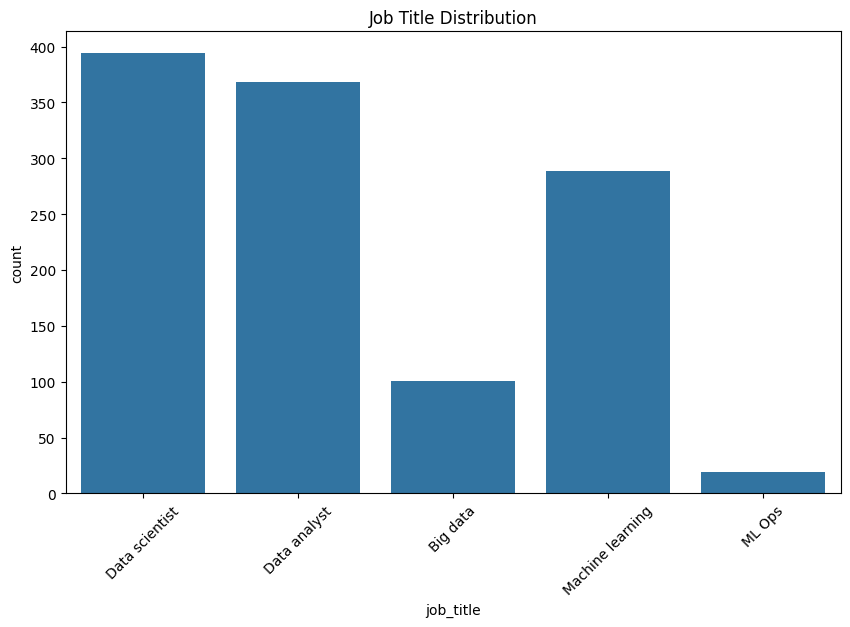

In [185]:
plt.figure(figsize=(10,6))
sns.countplot(x='job_title', data=df)
plt.xticks(rotation=45)
plt.title('Job Title Distribution')
plt.show()

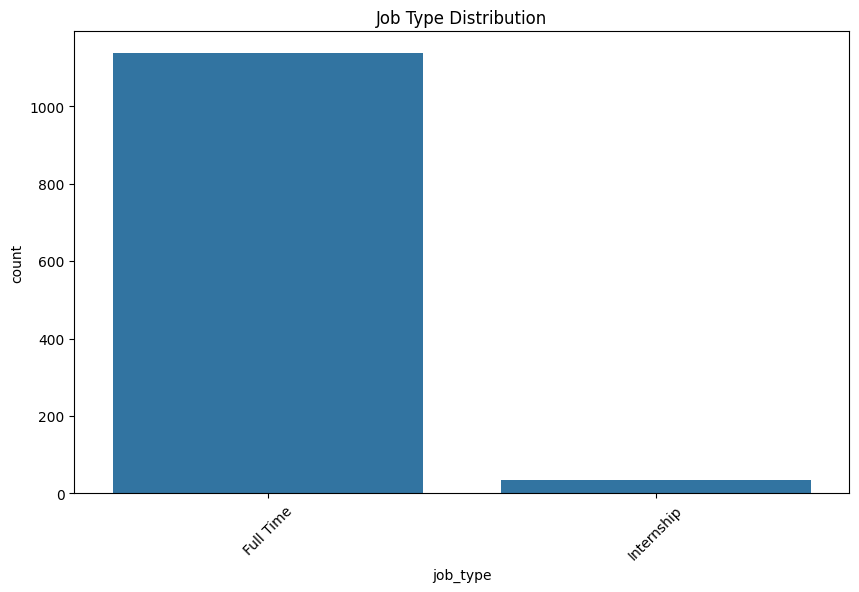

In [186]:
plt.figure(figsize=(10,6))
sns.countplot(x='job_type', data=df)
plt.xticks(rotation=45)
plt.title('Job Type Distribution')
plt.show()

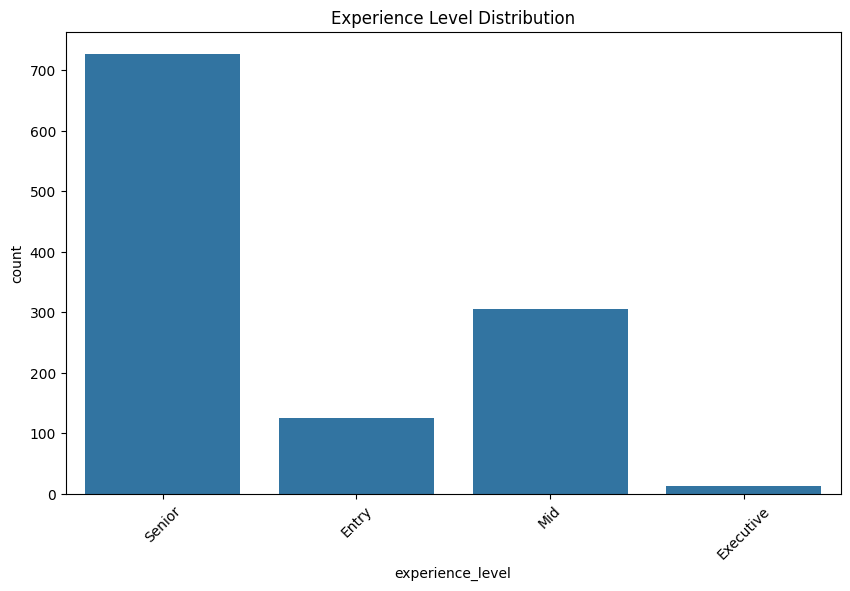

In [187]:
plt.figure(figsize=(10,6))
sns.countplot(x='experience_level', data=df)
plt.xticks(rotation=45)
plt.title('Experience Level Distribution')
plt.show()

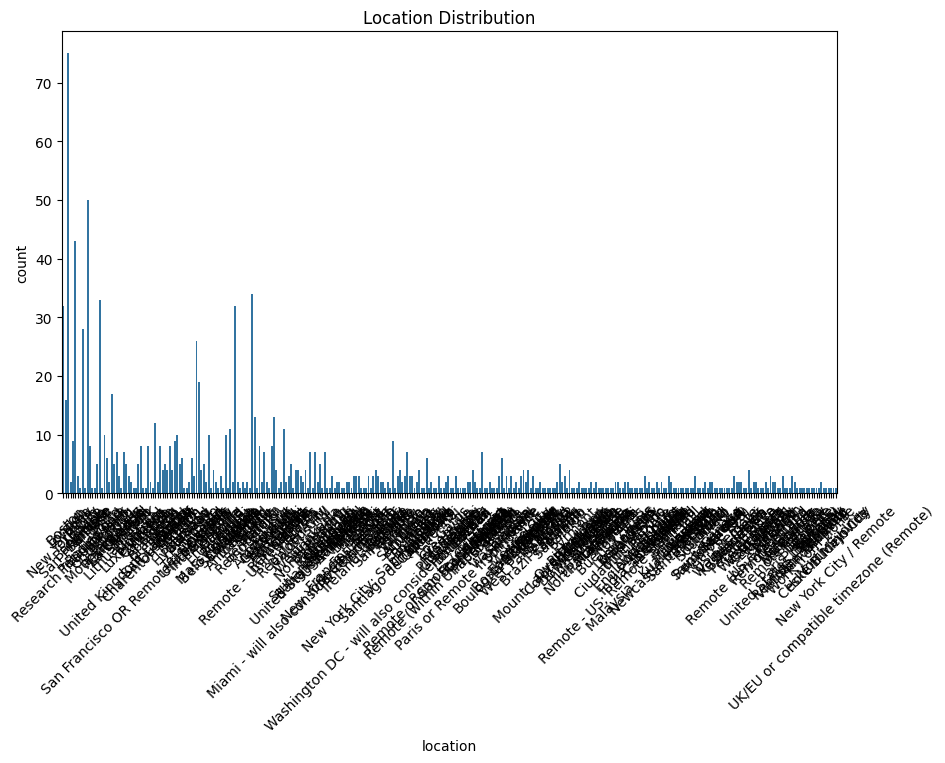

In [188]:
plt.figure(figsize=(10,6))
sns.countplot(x='location', data=df)
plt.xticks(rotation=45)
plt.title('Location Distribution')
plt.show()

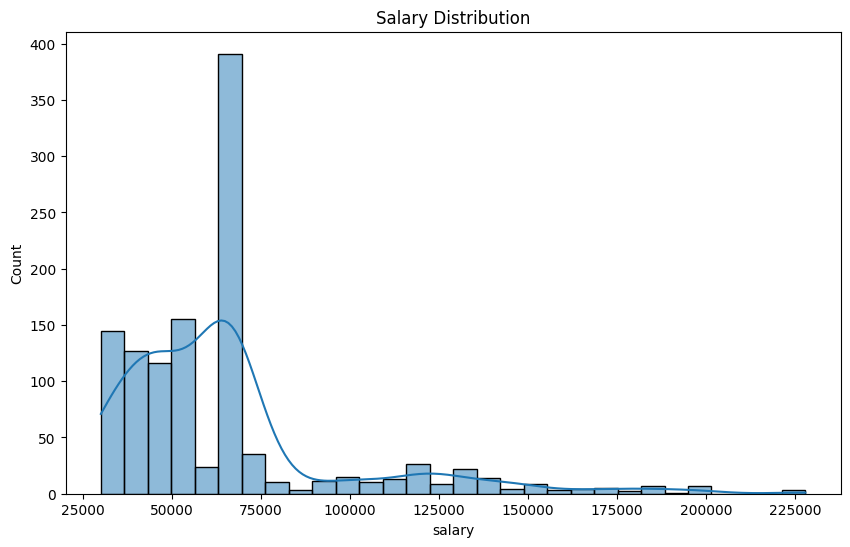

In [189]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.show()

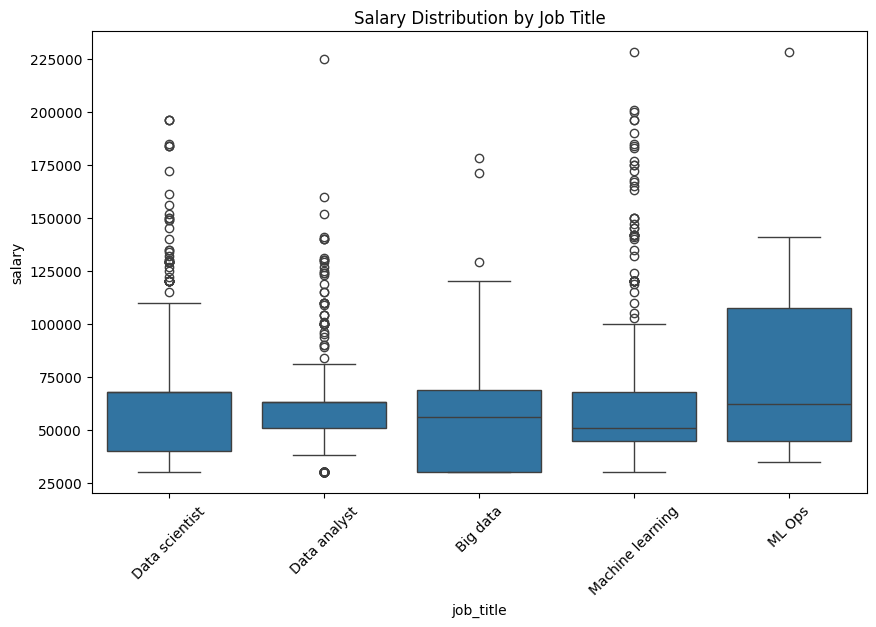

In [190]:
# Box plot to see salary distribution across different job titles
plt.figure(figsize=(10,6))
sns.boxplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Title')
plt.show()

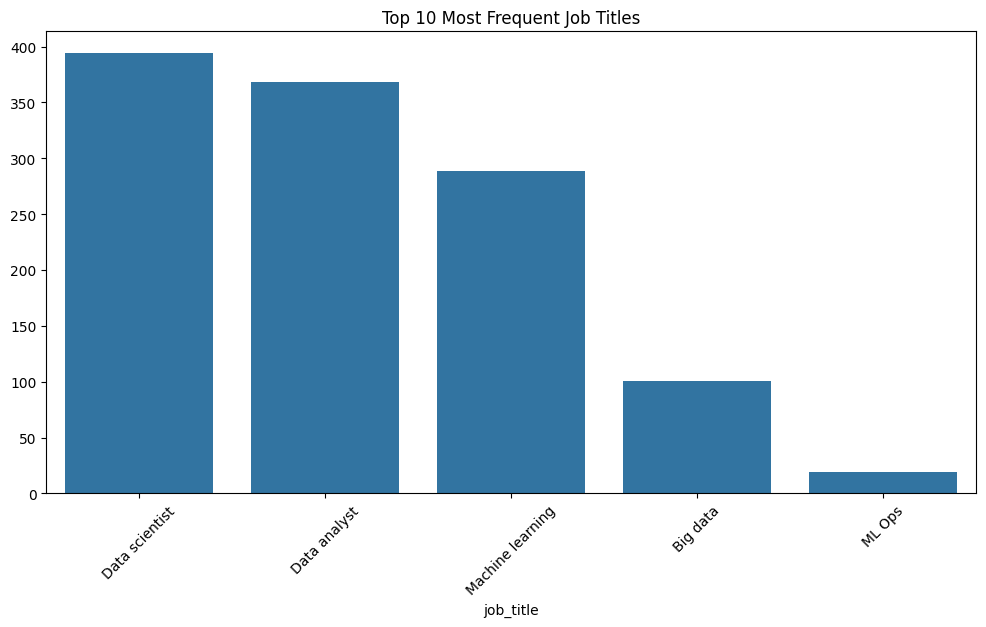

In [191]:
# Top 10 Job Titles
plt.figure(figsize=(12, 6))
top_job_titles = df['job_title'].value_counts().head(10)
sns.barplot(x=top_job_titles.index, y=top_job_titles.values)
plt.title('Top 10 Most Frequent Job Titles')
plt.xticks(rotation=45)
plt.show()


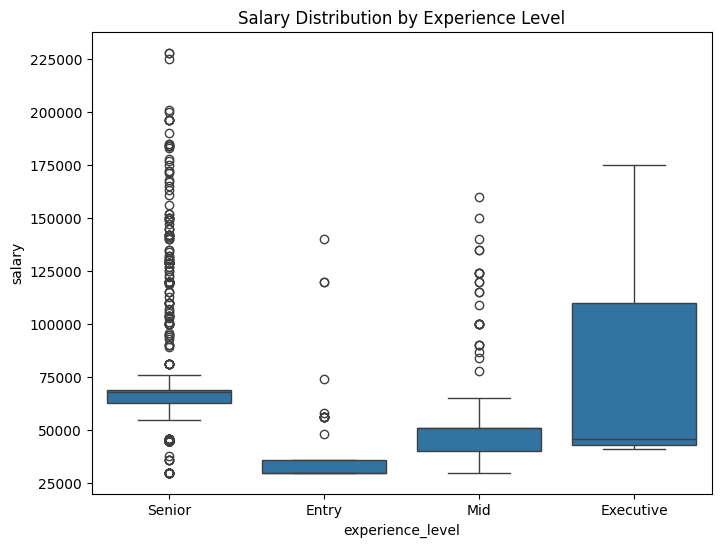

In [192]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution by Experience Level')
plt.show()


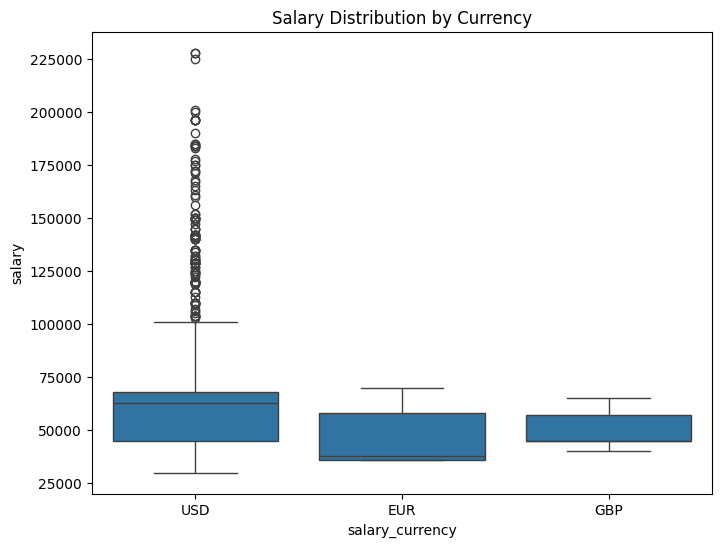

In [193]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary_currency', y='salary', data=df)
plt.title('Salary Distribution by Currency')
plt.show()


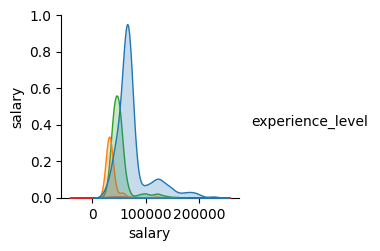

In [194]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['salary', 'experience_level', 'job_type', 'location']], hue='experience_level')
plt.show()


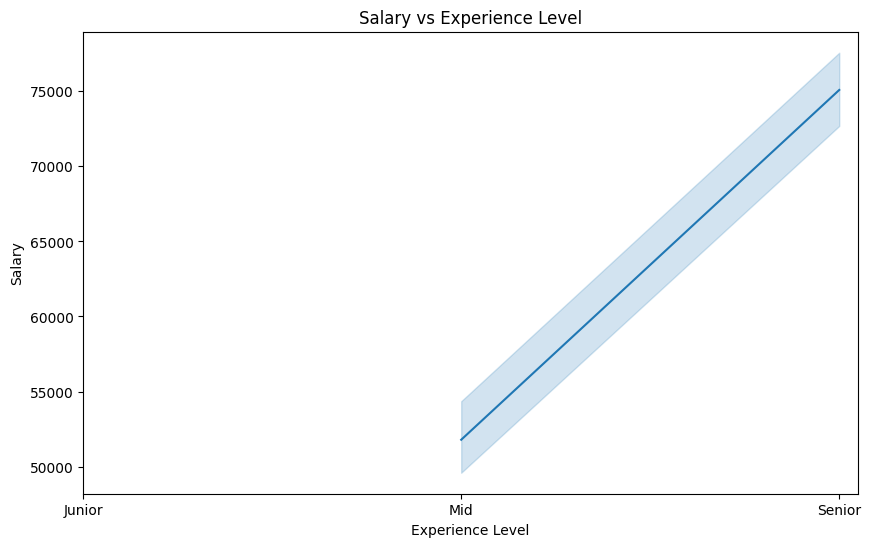

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'experience_level' to numerical if needed (e.g., Junior=1, Mid=2, Senior=3)
experience_level_map = {'Junior': 1, 'Mid': 2, 'Senior': 3}
df['experience_level_numeric'] = df['experience_level'].map(experience_level_map)

plt.figure(figsize=(10, 6))
sns.lineplot(x='experience_level_numeric', y='salary', data=df)
plt.xticks([1, 2, 3], ['Junior', 'Mid', 'Senior'])
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()


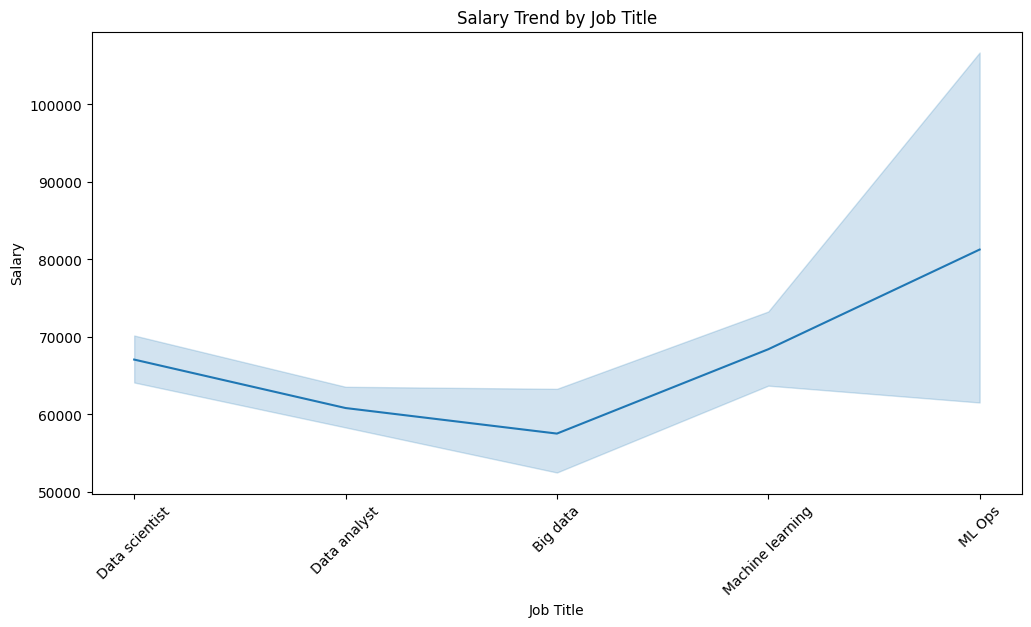

In [196]:
# If needed, encode job titles numerically (you can use LabelEncoder or manually map)
job_title_map = {job: idx for idx, job in enumerate(df['job_title'].unique())}
df['job_title_numeric'] = df['job_title'].map(job_title_map)

plt.figure(figsize=(12, 6))
sns.lineplot(x='job_title_numeric', y='salary', data=df)
plt.xticks(range(len(job_title_map)), job_title_map.keys(), rotation=45)
plt.title('Salary Trend by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()


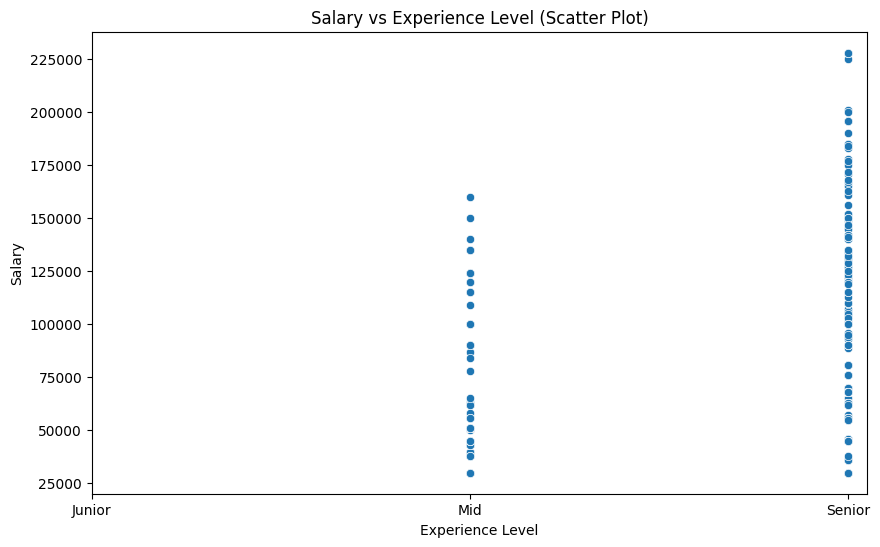

In [197]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience_level_numeric', y='salary', data=df)
plt.xticks([1, 2, 3], ['Junior', 'Mid', 'Senior'])
plt.title('Salary vs Experience Level (Scatter Plot)')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()


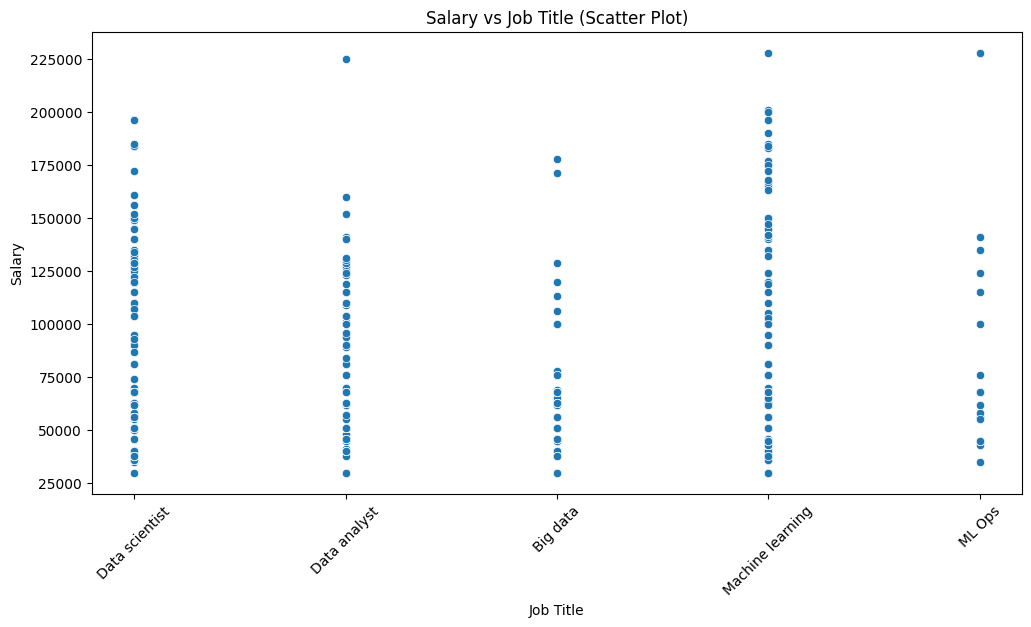

In [198]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='job_title_numeric', y='salary', data=df)
plt.xticks(range(len(job_title_map)), job_title_map.keys(), rotation=45)
plt.title('Salary vs Job Title (Scatter Plot)')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()


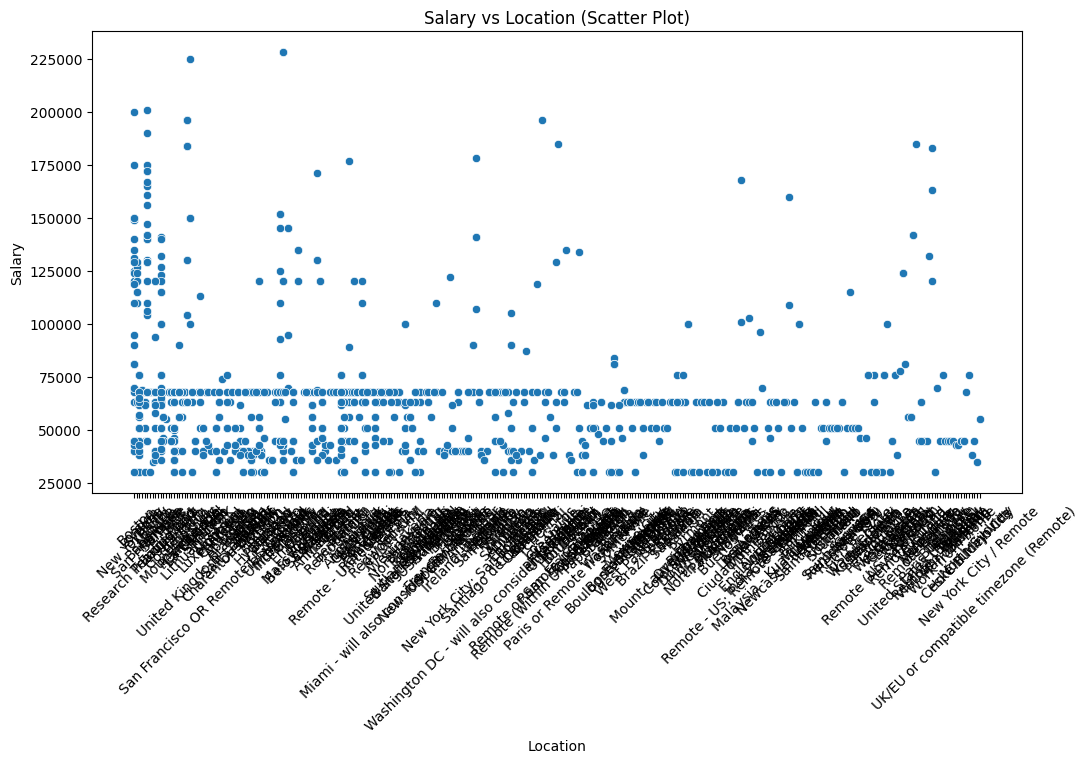

In [199]:
# Encoding location numerically for scatter plot
location_map = {location: idx for idx, location in enumerate(df['location'].unique())}
df['location_numeric'] = df['location'].map(location_map)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='location_numeric', y='salary', data=df)
plt.xticks(range(len(location_map)), location_map.keys(), rotation=45)
plt.title('Salary vs Location (Scatter Plot)')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.show()


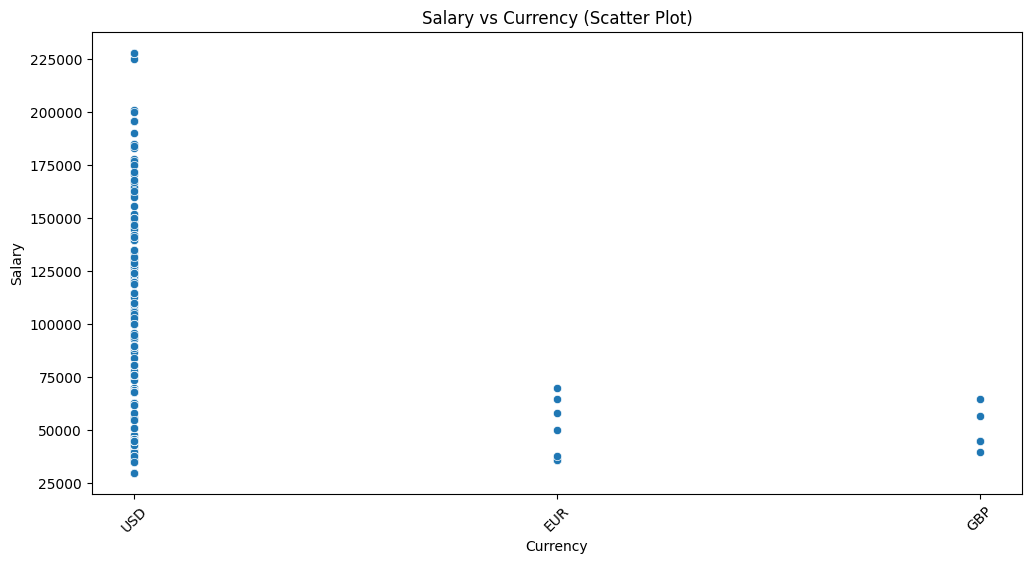

In [200]:
# Encoding salary_currency numerically for scatter plot
currency_map = {currency: idx for idx, currency in enumerate(df['salary_currency'].unique())}
df['currency_numeric'] = df['salary_currency'].map(currency_map)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='currency_numeric', y='salary', data=df)
plt.xticks(range(len(currency_map)), currency_map.keys(), rotation=45)
plt.title('Salary vs Currency (Scatter Plot)')
plt.xlabel('Currency')
plt.ylabel('Salary')
plt.show()


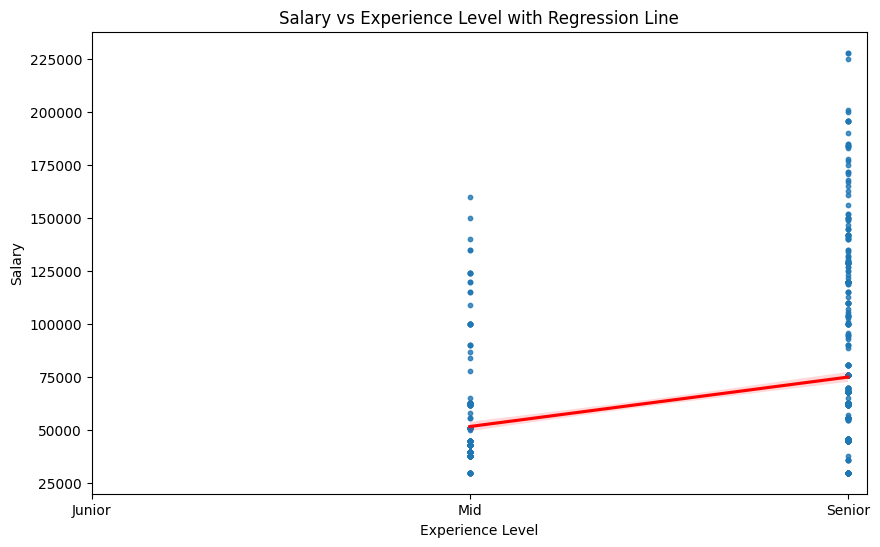

In [201]:
plt.figure(figsize=(10, 6))
sns.regplot(x='experience_level_numeric', y='salary', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xticks([1, 2, 3], ['Junior', 'Mid', 'Senior'])
plt.title('Salary vs Experience Level with Regression Line')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()


Steap-5 : Feature ENgineering and Selection

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1171 non-null   int64  
 1   job_title                 1171 non-null   object 
 2   job_type                  1171 non-null   object 
 3   experience_level          1171 non-null   object 
 4   location                  1171 non-null   object 
 5   salary_currency           1171 non-null   object 
 6   salary                    1171 non-null   int64  
 7   experience_level_numeric  1032 non-null   float64
 8   job_title_numeric         1171 non-null   int64  
 9   location_numeric          1171 non-null   int64  
 10  currency_numeric          1171 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 100.8+ KB


In [203]:
df.drop(["id","experience_level_numeric","job_title_numeric","location_numeric","currency_numeric"],axis=1,inplace=True)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         1171 non-null   object
 1   job_type          1171 non-null   object
 2   experience_level  1171 non-null   object
 3   location          1171 non-null   object
 4   salary_currency   1171 non-null   object
 5   salary            1171 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 55.0+ KB


In [205]:
#Split the Df In Catgorical and numerical Dataset
num=df.select_dtypes(exclude="O")
obj=df.select_dtypes(include="O")

In [206]:
num.shape,obj.shape

((1171, 1), (1171, 5))

In [207]:
#numerical data
num

,salary
0,149000
1,120000
2,68000
3,120000
4,149000
...,...
1166,228000
1167,115000
1168,76000
1169,68000


In [208]:
#categorical data 
obj

,job_title,job_type,experience_level,location,salary_currency
0,Data scientist,Full Time,Senior,New York City,USD
1,Data scientist,Full Time,Senior,Boston,USD
2,Data scientist,Full Time,Senior,London,USD
3,Data scientist,Full Time,Senior,Boston,USD
4,Data scientist,Full Time,Senior,New York City,USD
...,...,...,...,...,...
1166,ML Ops,Full Time,Senior,Toronto,USD
1167,ML Ops,Full Time,Senior,Boston,USD
1168,ML Ops,Full Time,Senior,Delhi,USD
1169,ML Ops,Full Time,Senior,San Francisco,USD


In [209]:
for i in obj.columns:
    print(obj[i].value_counts())

job_title
Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: count, dtype: int64
job_type
Full Time     1136
Internship      35
Name: count, dtype: int64
experience_level
Senior       727
Mid          305
Entry        126
Executive     13
Name: count, dtype: int64
location
London                    75
Remote                    50
San Francisco             43
Bengaluru                 34
Paris                     33
                          ..
Bogota                     1
Kampala                    1
Kirkland                   1
Riga                       1
New York City / Remote     1
Name: count, Length: 320, dtype: int64
salary_currency
USD    1157
EUR       9
GBP       5
Name: count, dtype: int64


In [210]:
d1=df["location"].value_counts().to_dict()

In [211]:
def filter_and_sort_dict(input_dict):
    # Filter dictionary where value is 1
    filtered_dict = {key: value for key, value in input_dict.items() if value <=6}

    # Sort the filtered dictionary by keys
    return dict(sorted(filtered_dict.items()))

# # Example dictionary
# my_dict = {'a': 1, 'b': 2, 'c': 1, 'd': 3, 'e': 1}

# Call the function and print the result
print(filter_and_sort_dict(d1))
d2=filter_and_sort_dict(d1)

{'Aarhus': 3, 'Aberdeen': 1, 'Abu Dhabi': 4, 'Ahmedabad': 2, 'Angeles': 1, 'Ann Arbor': 3, 'Antwerp': 2, 'Asia': 1, 'Athina': 1, 'Austin': 4, 'Australia': 1, 'Aventura': 1, 'Baar': 2, 'Ballerup': 1, 'Bang Kapi District': 1, 'BangPa-in': 1, 'Basel': 5, 'Beaverton': 2, 'Belfast': 1, 'Belgrade': 1, 'Belo Horizonte': 1, 'Berchem': 1, 'Berkeley': 1, 'Bogota': 1, 'Bogotá': 1, 'Bordeaux': 2, 'Boston - Remote': 2, 'Boulder': 2, 'Boulogne-Billancourt': 3, 'Bourdeaux': 1, 'Bracknell': 1, 'Brazil': 1, 'Brazil - Remote': 2, 'Brussels': 3, 'Bucharest': 2, 'Budapest': 1, 'Buenos Aires': 1, 'Bukit Jalil': 1, 'Burnaby': 2, 'Bühl': 1, 'Cairo': 1, 'Calabasas': 2, 'California': 1, 'Campinas': 3, 'Canada': 5, 'Cape Town': 6, 'Carquefou': 2, 'Cartagena': 1, 'Casa Grande': 2, 'Chantilly': 2, 'Charenton-Le-Pont': 2, 'Charlotte': 1, 'Chelmsford': 1, 'Chennai': 3, 'Chiasso': 1, 'Cincinnati': 1, 'Ciudad de México': 1, 'Cluj': 1, 'Colorado Springs': 4, 'Copenhagen': 1, 'Cork': 1, 'Dayton': 2, 'Delhi': 4, 'Denver

In [212]:
for i in d2:
    df = df[~df['location'].isin([i])]
df.shape

(644, 6)

In [213]:
df

,job_title,job_type,experience_level,location,salary_currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
1,Data scientist,Full Time,Senior,Boston,USD,120000
2,Data scientist,Full Time,Senior,London,USD,68000
3,Data scientist,Full Time,Senior,Boston,USD,120000
4,Data scientist,Full Time,Senior,New York City,USD,149000
...,...,...,...,...,...,...
1165,ML Ops,Full Time,Senior,Remote,USD,100000
1166,ML Ops,Full Time,Senior,Toronto,USD,228000
1167,ML Ops,Full Time,Senior,Boston,USD,115000
1169,ML Ops,Full Time,Senior,San Francisco,USD,68000


In [214]:
for i in df.columns:
    print(df[i].value_counts())

job_title
Data scientist      220
Machine learning    193
Data analyst        170
Big data             52
ML Ops                9
Name: count, dtype: int64
job_type
Full Time     616
Internship     28
Name: count, dtype: int64
experience_level
Senior       428
Mid          159
Entry         50
Executive      7
Name: count, dtype: int64
location
London                    75
Remote                    50
San Francisco             43
Bengaluru                 34
Paris                     33
New York City             32
Bangkok                   32
Berlin                    28
United States             26
Toronto                   19
Brooklyn                  17
Boston                    16
Barcelona                 13
Seattle                   13
Brampton                  12
Singapore                 11
Santa Clara               11
Roppongi                  10
Seoul                     10
Warsaw                    10
Mountain View             10
Dallas                     9
Palo Alto      

In [215]:
#to reset the index 
df.index=range(len(df))

In [216]:
df

,job_title,job_type,experience_level,location,salary_currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
1,Data scientist,Full Time,Senior,Boston,USD,120000
2,Data scientist,Full Time,Senior,London,USD,68000
3,Data scientist,Full Time,Senior,Boston,USD,120000
4,Data scientist,Full Time,Senior,New York City,USD,149000
...,...,...,...,...,...,...
639,ML Ops,Full Time,Senior,Remote,USD,100000
640,ML Ops,Full Time,Senior,Toronto,USD,228000
641,ML Ops,Full Time,Senior,Boston,USD,115000
642,ML Ops,Full Time,Senior,San Francisco,USD,68000


Steap-6: Data Preprocessing


In [217]:
#to split the data sets 
num=df.select_dtypes(exclude="O") #stores Numerical
obj=df.select_dtypes(include="O") #stores Catgorical 

In [218]:
from sklearn.preprocessing import OrdinalEncoder


In [219]:
encoder=OrdinalEncoder()

In [220]:
encoder.fit(obj)

OrdinalEncoder()

In [221]:
encoded_data=encoder.transform(obj)

In [222]:
encoder.get_feature_names_out()

array(['job_title', 'job_type', 'experience_level', 'location',
       'salary_currency'], dtype=object)

In [223]:
obj2=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

In [224]:
obj2

,job_title,job_type,experience_level,location,salary_currency
0,2.0,0.0,3.0,19.0,2.0
1,2.0,0.0,3.0,8.0,2.0
2,2.0,0.0,3.0,14.0,2.0
3,2.0,0.0,3.0,8.0,2.0
4,2.0,0.0,3.0,19.0,2.0
...,...,...,...,...,...
639,3.0,0.0,3.0,22.0,2.0
640,3.0,0.0,3.0,35.0,2.0
641,3.0,0.0,3.0,8.0,2.0
642,3.0,0.0,3.0,26.0,2.0


In [225]:
final_df=pd.concat([obj2,num],axis=1)

In [226]:
final_df

,job_title,job_type,experience_level,location,salary_currency,salary
0,2.0,0.0,3.0,19.0,2.0,149000
1,2.0,0.0,3.0,8.0,2.0,120000
2,2.0,0.0,3.0,14.0,2.0,68000
3,2.0,0.0,3.0,8.0,2.0,120000
4,2.0,0.0,3.0,19.0,2.0,149000
...,...,...,...,...,...,...
639,3.0,0.0,3.0,22.0,2.0,100000
640,3.0,0.0,3.0,35.0,2.0,228000
641,3.0,0.0,3.0,8.0,2.0,115000
642,3.0,0.0,3.0,26.0,2.0,68000


In [227]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         644 non-null    float64
 1   job_type          644 non-null    float64
 2   experience_level  644 non-null    float64
 3   location          644 non-null    float64
 4   salary_currency   644 non-null    float64
 5   salary            644 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 30.3 KB


In [228]:
# import pandas as pd
# from sklearn.preprocessing import OrdinalEncoder

# # Sample DataFrame (replace this with your actual DataFrame)
# # data = {
# #     'job_title': ['Data Scientist', 'Software Engineer', 'Data Analyst', 'Product Manager', 'Software Engineer'],
# #     'job_type': ['Full-time', 'Contract', 'Full-time', 'Part-time', 'Full-time'],
# #     'experience_level': ['Junior', 'Senior', 'Mid', 'Senior', 'Junior'],
# #     'location': ['San Francisco', 'New York', 'Los Angeles', 'San Francisco', 'New York'],
# #     'salary_currency': ['USD', 'EUR', 'USD', 'USD', 'EUR']
# # }
# # df = pd.DataFrame(data)

# # OrdinalEncoder setup
# ordinal_encoder = OrdinalEncoder()

# # Encoding the categorical columns
# # encoded_columns = ['job_title', 'job_type', 'experience_level', 'location', 'salary_currency']
# encoded_df = obj.copy()

# # Apply the encoder to each column
# for col in obj.columns:
#     encoded_df[col] = ordinal_encoder.fit_transform(obj[[col]])

# # Print the mapping of each column's categories to their encoded digits
# for i, col in enumerate(obj.columns):
#     print(f"\nMapping for column '{col}':")
#     category_mapping = dict(zip(ordinal_encoder.categories_[i], range(len(ordinal_encoder.categories_[i]))))
#     print(category_mapping)

# # Display the original and encoded DataFrame
# print("\nOriginal DataFrame:")
# print(df)

# print("\nEncoded DataFrame:")
# print(encoded_df)


Steap-7 : Data Spliting 


In [229]:
#Spliting the df in :
# Feature Variable -> X (Independent varaible)
# Target Variable -> Y (Dependent Variable)

In [230]:
df=final_df

In [231]:
#For X 
x=df.drop("salary",axis=1)
x

,job_title,job_type,experience_level,location,salary_currency
0,2.0,0.0,3.0,19.0,2.0
1,2.0,0.0,3.0,8.0,2.0
2,2.0,0.0,3.0,14.0,2.0
3,2.0,0.0,3.0,8.0,2.0
4,2.0,0.0,3.0,19.0,2.0
...,...,...,...,...,...
639,3.0,0.0,3.0,22.0,2.0
640,3.0,0.0,3.0,35.0,2.0
641,3.0,0.0,3.0,8.0,2.0
642,3.0,0.0,3.0,26.0,2.0


In [232]:
#For Y 
y=df[["salary"]]

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [235]:
x_train

,job_title,job_type,experience_level,location,salary_currency
515,4.0,0.0,3.0,26.0,2.0
29,2.0,0.0,3.0,2.0,2.0
274,1.0,0.0,2.0,1.0,2.0
576,4.0,0.0,3.0,22.0,2.0
434,0.0,0.0,3.0,6.0,2.0
...,...,...,...,...,...
71,2.0,0.0,3.0,7.0,2.0
106,2.0,0.0,0.0,21.0,2.0
270,1.0,0.0,2.0,2.0,2.0
435,0.0,0.0,2.0,6.0,2.0


In [236]:
x_test

,job_title,job_type,experience_level,location,salary_currency
631,4.0,0.0,0.0,32.0,2.0
592,4.0,0.0,3.0,6.0,2.0
599,4.0,0.0,3.0,27.0,2.0
291,1.0,0.0,3.0,23.0,2.0
72,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...
513,4.0,0.0,2.0,5.0,2.0
630,4.0,0.0,3.0,22.0,2.0
215,2.0,0.0,3.0,26.0,2.0
607,4.0,0.0,2.0,36.0,2.0


In [237]:
y_train

,salary
515,142000
29,68000
274,51000
576,100000
434,76000
...,...
71,68000
106,36000
270,51000
435,30000


In [238]:
y_test

,salary
631,30000
592,45000
599,45000
291,89000
72,36000
...,...
513,40000
630,68000
215,129000
607,43000


Steap-8 : Model Selection 

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
lnr=LinearRegression()

Steap-9 : Model Training

In [241]:
lnr.fit(x_train,y_train)

LinearRegression()

In [242]:
lnr.score(x_test,y_test)

0.1882890043085631

In [249]:
lnr.score(x_train,y_train)

0.13695879227357644

In [243]:
y_pred=lnr.predict(x_test)

In [244]:
y_test["Prediction"]=y_pred

In [245]:
y_test

,salary,Prediction
631,30000,39183.968028
592,45000,79055.285465
599,45000,82668.184455
291,89000,75175.049198
72,36000,29141.955458
...,...,...
513,40000,64101.765832
630,68000,81807.970409
215,129000,77959.498965
607,43000,69435.092912


In [246]:
compare_df=pd.concat([x_test,y_test],axis=1)

In [247]:
compare_df

,job_title,job_type,experience_level,location,salary_currency,salary,Prediction
631,4.0,0.0,0.0,32.0,2.0,30000,39183.968028
592,4.0,0.0,3.0,6.0,2.0,45000,79055.285465
599,4.0,0.0,3.0,27.0,2.0,45000,82668.184455
291,1.0,0.0,3.0,23.0,2.0,89000,75175.049198
72,2.0,0.0,0.0,0.0,2.0,36000,29141.955458
...,...,...,...,...,...,...,...
513,4.0,0.0,2.0,5.0,2.0,40000,64101.765832
630,4.0,0.0,3.0,22.0,2.0,68000,81807.970409
215,2.0,0.0,3.0,26.0,2.0,129000,77959.498965
607,4.0,0.0,2.0,36.0,2.0,43000,69435.092912


Steap-10 : Model Evaluation 

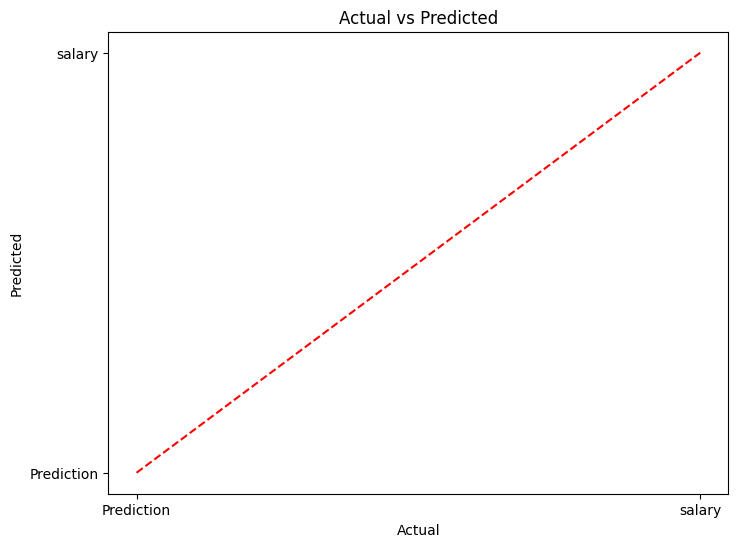

In [251]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test["salary"], y_test["Prediction"])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# #Linner Regression Evaluation :
# # 1. Residual Analysis
# 2. R-squared (R²) Score
# 3.Mean Absolute Error (MAE)
# 4.Mean Squared Error (MSE)
# 5.Root Mean Squared Error (RMSE)
# 6. Adjusted R-squared 

Model save


In [252]:
import joblib ,pickle

In [253]:
joblib.dump(encoder,"OrdinalEncoder.lb")

['OrdinalEncoder.lb']

In [254]:
joblib.dump(lnr,"salary-prediction-model.lb")

['salary-prediction-model.lb']

In [256]:
model=joblib.load("salary-prediction-model.lb")

In [257]:
encoder=joblib.load("OrdinalEncoder.lb")

Extra work

In [258]:
compare_df.columns

Index(['job_title', 'job_type', 'experience_level', 'location',
       'salary_currency', 'salary', 'Prediction'],
      dtype='object')